In [297]:
import pandas as pd
import numpy as np
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [66]:
data = pd.read_csv('blockbusters.csv')

In [67]:
data = data.drop(['studio', 'rating', 'worldwide_gross'], axis=1)

In [68]:
data

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,title,year
0,Action,Adventure,Drama,7.4,135,1,Black Panther,2018
1,Action,Adventure,Sci-Fi,8.5,156,2,Avengers: Infinity War,2018
2,Animation,Action,Adventure,7.8,118,3,Incredibles 2,2018
3,Action,Adventure,Drama,6.2,129,4,Jurassic World: Fallen Kingdom,2018
4,Action,Comedy,NaN,7.8,119,5,Deadpool 2,2018
...,...,...,...,...,...,...,...,...
432,Thriller,Crime,Comedy,7.1,113,6,The Return of the Pink Panther,1975
433,Music,Drama,Comedy,6.4,136,7,Funny Lady,1975
434,Family,Western,Comedy,6.2,100,8,The Apple Dumpling Gang,1975
435,Drama,NaN,NaN,6.0,88,9,"Aloha, Bobby and Rose",1975


In [21]:
data = data[data['imdb_rating'] > 7]

In [7]:
un = list(set(data['Main_Genre'].unique()) | set(data['Genre_2'].unique()) | set(data['Genre_3'].unique()))

In [8]:
un

[nan,
 'Crime',
 'Adventure',
 'Action',
 'Sci-Fi',
 'Music',
 'Drama',
 'Musical',
 'Western',
 'Documentary',
 'Fantasy',
 'Comedy',
 'History',
 'Horror',
 'Family',
 'Sport',
 'Mystery',
 'Biography',
 'Thriller',
 'War',
 'Animation',
 'Romance']

In [9]:
un = un[1:]

In [10]:
for i in un:
    s = 'is_'+i
    data[s] = (data['Main_Genre'] == i) + (data['Genre_2'] == i) + (data['Genre_3'] == i)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [11]:
data = data.drop(['Main_Genre', 'Genre_2', 'Genre_3'], axis=1).set_index('title')

In [12]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(n_neighbors = 6)

In [13]:
data.drop('length', 'year')

,imdb_rating,length,rank_in_year,year,is_Crime,is_Adventure,is_Action,is_Sci-Fi,is_Music,is_Drama,...,is_History,is_Horror,is_Family,is_Sport,is_Mystery,is_Biography,is_Thriller,is_War,is_Animation,is_Romance
title,,,,,,,,,,,,,,,,,,,,,
Black Panther,7.4,135,1,2018,False,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
Avengers: Infinity War,8.5,156,2,2018,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Incredibles 2,7.8,118,3,2018,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
Jurassic World: Fallen Kingdom,6.2,129,4,2018,False,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
Deadpool 2,7.8,119,5,2018,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Return of the Pink Panther,7.1,113,6,1975,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
Funny Lady,6.4,136,7,1975,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
The Apple Dumpling Gang,6.2,100,8,1975,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [19]:
model.fit(data.drop(['year', 'length'], axis=1))

NearestNeighbors(n_neighbors=6)

In [20]:
data.iloc[model.kneighbors([data.drop(['year', 'length'], axis=1).loc['Incredibles 2']])[1][0][1:]].index

Index(['Kung Fu Panda', 'Ice Age: Dawn of the Dinosaurs',
       'Ice Age: The Meltdown', 'The Incredibles', 'Spider-Man 2'],
      dtype='object', name='title')

# Add new dataset

In [147]:
movies = pd.read_csv('IMDb movies.csv')

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [148]:
movies = movies[movies['title'].isin(data['title'])]

In [149]:
movies = movies[movies['year'].apply(get_year) > 1974]

In [40]:
import re

def get_year(date):
    try:
        return int(date)
    except ValueError:
            print(re.sub('\D','',date))
            return int(re.sub('\D','',date))

In [51]:
movies.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [150]:
movies = movies[['imdb_title_id', 'title', 'year', 'director', 'actors', 'description', 'avg_vote' , 'genre']]

In [151]:
movies = movies.sort_values(by='title')

In [152]:
movies

,imdb_title_id,title,year,director,actors,description,avg_vote,genre
45783,tt0416449,300,2006,Zack Snyder,"Gerard Butler, Lena Headey, Dominic West, Davi...",King Leonidas of Sparta and a force of 300 men...,7.6,"Action, Drama"
26383,tt0103639,Aladdin,1992,"Ron Clements, John Musker","Scott Weinger, Robin Williams, Linda Larkin, J...",A kindhearted street urchin and a power-hungry...,8.0,"Animation, Adventure, Comedy"
79742,tt6139732,Aladdin,2019,Guy Ritchie,"Will Smith, Mena Massoud, Naomi Scott, Marwan ...",A kind-hearted street urchin and a power-hungr...,7.0,"Adventure, Family, Fantasy"
18768,tt0078748,Alien,1979,Ridley Scott,"Tom Skerritt, Sigourney Weaver, Veronica Cartw...",After a space merchant vessel receives an unkn...,8.4,"Horror, Sci-Fi"
34295,tt0169547,American Beauty,1999,Sam Mendes,"Kevin Spacey, Annette Bening, Thora Birch, Wes...",A sexually frustrated suburban father has a mi...,8.3,Drama
...,...,...,...,...,...,...,...,...
42428,tt0332452,Troy,2004,Wolfgang Petersen,"Julian Glover, Brian Cox, Nathan Jones, Adoni ...","An adaptation of Homer's great epic, the film ...",7.2,"Drama, History"
28551,tt0111503,True Lies,1994,James Cameron,"Arnold Schwarzenegger, Jamie Lee Curtis, Tom A...","A fearless, globe-trotting, terrorist-battling...",7.2,"Action, Comedy, Thriller"
53077,tt1049413,Up,2009,"Pete Docter, Bob Peterson","Edward Asner, Christopher Plummer, Jordan Naga...",78-year-old Carl Fredricksen travels to Paradi...,8.2,"Animation, Adventure, Comedy"
47292,tt0451279,Wonder Woman,2017,Patty Jenkins,"Gal Gadot, Chris Pine, Connie Nielsen, Robin W...",When a pilot crashes and tells of conflict in ...,7.4,"Action, Adventure, Fantasy"


In [153]:
data = data.sort_values(by='title')

In [73]:
data = data[data['title'].isin(movies['title'])]

In [71]:
data['title'].unique

<bound method Series.unique of 321            "Crocodile" Dundee
305         "Crocodile" Dundee II
396                            10
225                101 Dalmatians
94                           2012
                  ...            
188                         X-Men
45     X-Men: Days of Future Past
126         X-Men: The Last Stand
158                            X2
26                       Zootopia
Name: title, Length: 437, dtype: object>

In [81]:
movies = movies[movies['title'].isin(data['title'])][movies['year'].apply(get_year) < 2019]

In [85]:
data = data.reset_index(drop=True)

In [86]:
movies = movies.reset_index(drop=True)

In [154]:
data

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,title
0,War,Fantasy,Action,7.8,117,300
1,Comedy,Animation,Adventure,8.0,90,Aladdin
2,Sci-Fi,Horror,NaN,8.5,117,Alien
3,Romance,Drama,NaN,8.4,122,American Beauty
4,Action,Comedy,NaN,7.2,118,Ant-Man and the Wasp
...,...,...,...,...,...,...
82,Adventure,NaN,NaN,7.2,163,Troy
83,Thriller,Comedy,Action,7.2,141,True Lies
84,Comedy,Animation,Adventure,8.3,96,Up
85,Action,Adventure,Drama,7.5,141,Wonder Woman


In [155]:
movies.join(data, on='title', how='outer')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [156]:
movies

,imdb_title_id,title,year,director,actors,description,avg_vote,genre
45783,tt0416449,300,2006,Zack Snyder,"Gerard Butler, Lena Headey, Dominic West, Davi...",King Leonidas of Sparta and a force of 300 men...,7.6,"Action, Drama"
26383,tt0103639,Aladdin,1992,"Ron Clements, John Musker","Scott Weinger, Robin Williams, Linda Larkin, J...",A kindhearted street urchin and a power-hungry...,8.0,"Animation, Adventure, Comedy"
79742,tt6139732,Aladdin,2019,Guy Ritchie,"Will Smith, Mena Massoud, Naomi Scott, Marwan ...",A kind-hearted street urchin and a power-hungr...,7.0,"Adventure, Family, Fantasy"
18768,tt0078748,Alien,1979,Ridley Scott,"Tom Skerritt, Sigourney Weaver, Veronica Cartw...",After a space merchant vessel receives an unkn...,8.4,"Horror, Sci-Fi"
34295,tt0169547,American Beauty,1999,Sam Mendes,"Kevin Spacey, Annette Bening, Thora Birch, Wes...",A sexually frustrated suburban father has a mi...,8.3,Drama
...,...,...,...,...,...,...,...,...
42428,tt0332452,Troy,2004,Wolfgang Petersen,"Julian Glover, Brian Cox, Nathan Jones, Adoni ...","An adaptation of Homer's great epic, the film ...",7.2,"Drama, History"
28551,tt0111503,True Lies,1994,James Cameron,"Arnold Schwarzenegger, Jamie Lee Curtis, Tom A...","A fearless, globe-trotting, terrorist-battling...",7.2,"Action, Comedy, Thriller"
53077,tt1049413,Up,2009,"Pete Docter, Bob Peterson","Edward Asner, Christopher Plummer, Jordan Naga...",78-year-old Carl Fredricksen travels to Paradi...,8.2,"Animation, Adventure, Comedy"
47292,tt0451279,Wonder Woman,2017,Patty Jenkins,"Gal Gadot, Chris Pine, Connie Nielsen, Robin W...",When a pilot crashes and tells of conflict in ...,7.4,"Action, Adventure, Fantasy"


In [157]:
movies['genre'] = movies.genre.apply(lambda x: x.split(', '))

In [158]:
movies['genre']

45783                   [Action, Drama]
26383    [Animation, Adventure, Comedy]
79742      [Adventure, Family, Fantasy]
18768                  [Horror, Sci-Fi]
34295                           [Drama]
                      ...              
42428                  [Drama, History]
28551        [Action, Comedy, Thriller]
53077    [Animation, Adventure, Comedy]
47292      [Action, Adventure, Fantasy]
31381       [Action, Adventure, Sci-Fi]
Name: genre, Length: 101, dtype: object

In [118]:
genres = []
for i in movies['genre']:
    genres += i

In [123]:
genres = list(set(genres))

In [129]:
for i in range(len(genres)):
    genres[i] = re.sub('\s', '', genres[i])

In [159]:
genres

['Crime',
 'Adventure',
 'Action',
 'Sci-Fi',
 'History',
 'Adventure',
 'Romance',
 'Thriller',
 'Action',
 'Fantasy',
 'War',
 'Drama',
 'Thriller',
 'Crime',
 'Comedy',
 'Comedy',
 'Horror',
 'Mystery',
 'Family',
 'Horror',
 'Biography',
 'Drama',
 'Animation',
 'Sport']

In [144]:
genres

['Crime',
 'Adventure',
 'Action',
 'Sci-Fi',
 'History',
 'Adventure',
 'Romance',
 'Thriller',
 'Action',
 'Fantasy',
 'War',
 'Drama',
 'Thriller',
 'Crime',
 'Comedy',
 'Comedy',
 'Horror',
 'Mystery',
 'Family',
 'Horror',
 'Biography',
 'Drama',
 'Animation',
 'Sport']

In [164]:
movies[genres] = 0


In [167]:
'Action' in movies.genre[0]

True

In [171]:
for i in range(len(movies)):
    for j in genres:
        print(j)
        movies[j][i] = j in movies['genre'][i]

Crime
Adventure
Action
Sci-Fi
History
Adventure
Romance
Thriller
Action
Fantasy
War
Drama
Thriller
Crime
Comedy
Comedy
Horror
Mystery
Family
Horror
Biography
Drama
Animation
Sport
Crime
Adventure
Action
Sci-Fi
History
Adventure
Romance
Thriller
Action
Fantasy
War
Drama
Thriller
Crime
Comedy
Comedy
Horror
Mystery
Family
Horror
Biography
Drama
Animation
Sport
Crime
Adventure
Action
Sci-Fi
History
Adventure
Romance
Thriller
Action
Fantasy
War
Drama
Thriller
Crime
Comedy
Comedy
Horror
Mystery
Family
Horror
Biography
Drama
Animation
Sport
Crime
Adventure
Action
Sci-Fi
History
Adventure
Romance
Thriller
Action
Fantasy
War
Drama
Thriller
Crime
Comedy
Comedy
Horror
Mystery
Family
Horror
Biography
Drama
Animation
Sport
Crime
Adventure
Action
Sci-Fi
History
Adventure
Romance
Thriller
Action
Fantasy
War
Drama
Thriller
Crime
Comedy
Comedy
Horror
Mystery
Family
Horror
Biography
Drama
Animation
Sport
Crime
Adventure
Action
Sci-Fi
History
Adventure
Romance
Thriller
Action
Fantasy
War
Drama
Thriller
C

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Drama
Animation
Sport
Crime
Adventure
Action
Sci-Fi
History
Adventure
Romance
Thriller
Action
Fantasy
War
Drama
Thriller
Crime
Comedy
Comedy
Horror
Mystery
Family
Horror
Biography
Drama
Animation
Sport
Crime
Adventure
Action
Sci-Fi
History
Adventure
Romance
Thriller
Action
Fantasy
War
Drama
Thriller
Crime
Comedy
Comedy
Horror
Mystery
Family
Horror
Biography
Drama
Animation
Sport
Crime
Adventure
Action
Sci-Fi
History
Adventure
Romance
Thriller
Action
Fantasy
War
Drama
Thriller
Crime
Comedy
Comedy
Horror
Mystery
Family
Horror
Biography
Drama
Animation
Sport
Crime
Adventure
Action
Sci-Fi
History
Adventure
Romance
Thriller
Action
Fantasy
War
Drama
Thriller
Crime
Comedy
Comedy
Horror
Mystery
Family
Horror
Biography
Drama
Animation
Sport
Crime
Adventure
Action
Sci-Fi
History
Adventure
Romance
Thriller
Action
Fantasy
War
Drama
Thriller
Crime
Comedy
Comedy
Horror
Mystery
Family
Horror
Biography
Drama
Animation
Sport
Crime
Adventure
Action
Sci-Fi
History
Adventure
Romance
Thriller
Action
Fantas

Action
Fantasy
War
Drama
Thriller
Crime
Comedy
Comedy
Horror
Mystery
Family
Horror
Biography
Drama
Animation
Sport
Crime
Adventure
Action
Sci-Fi
History
Adventure
Romance
Thriller
Action
Fantasy
War
Drama
Thriller
Crime
Comedy
Comedy
Horror
Mystery
Family
Horror
Biography
Drama
Animation
Sport
Crime
Adventure
Action
Sci-Fi
History
Adventure
Romance
Thriller
Action
Fantasy
War
Drama
Thriller
Crime
Comedy
Comedy
Horror
Mystery
Family
Horror
Biography
Drama
Animation
Sport
Crime
Adventure
Action
Sci-Fi
History
Adventure
Romance
Thriller
Action
Fantasy
War
Drama
Thriller
Crime
Comedy
Comedy
Horror
Mystery
Family
Horror
Biography
Drama
Animation
Sport
Crime
Adventure
Action
Sci-Fi
History
Adventure
Romance
Thriller
Action
Fantasy
War
Drama
Thriller
Crime
Comedy
Comedy
Horror
Mystery
Family
Horror
Biography
Drama
Animation
Sport
Crime
Adventure
Action
Sci-Fi
History
Adventure
Romance
Thriller
Action
Fantasy
War
Drama
Thriller
Crime
Comedy
Comedy
Horror
Mystery
Family
Horror
Biography
Drama
A

In [207]:
movies.columns

Index(['imdb_title_id', 'title', 'year', 'director', 'actors', 'description',
       'avg_vote', 'Crime', 'Adventure', 'Action', 'Sci-Fi', 'History',
       'Romance', 'Thriller', 'Fantasy', 'War', 'Drama', 'Comedy', 'Horror',
       'Mystery', 'Family', 'Biography', 'Animation', 'Sport'],
      dtype='object')

In [214]:
films = movies[['imdb_title_id', 'title', 'description', 'avg_vote']]

In [280]:
films

,avg_rating,imdb_title_id,name,preview
0,7.6,tt0416449,300,King Leonidas of Sparta and a force of 300 men...
1,8.0,tt0103639,Aladdin,A kindhearted street urchin and a power-hungry...
2,7.0,tt6139732,Aladdin,A kind-hearted street urchin and a power-hungr...
3,8.4,tt0078748,Alien,After a space merchant vessel receives an unkn...
4,8.3,tt0169547,American Beauty,A sexually frustrated suburban father has a mi...
...,...,...,...,...
96,7.2,tt0332452,Troy,"An adaptation of Homer's great epic, the film ..."
97,7.2,tt0111503,True Lies,"A fearless, globe-trotting, terrorist-battling..."
98,8.2,tt1049413,Up,78-year-old Carl Fredricksen travels to Paradi...
99,7.4,tt0451279,Wonder Woman,When a pilot crashes and tells of conflict in ...


In [279]:
films.to_csv('films.csv', sep=';')

In [161]:
movies = movies.reset_index(drop=True)

In [176]:
movies.to_csv('movies.csv')

In [175]:
movies = movies.drop('genre', axis=1)

In [179]:
movies.index = [''] * 101

In [181]:
movies.to_csv('movies_index.csv')

In [268]:
user_movies=pd.DataFrame()

In [269]:
user_movies[movies.imdb_title_id] = 0

In [270]:
user_movies = user_movies.append([0]*101).drop(0, axis=1)

In [186]:
ratings = pd.read_csv('IMDb ratings.csv')

In [189]:
ratings = ratings[ratings['imdb_title_id'].isin(movies['imdb_title_id'])]

In [201]:
rate_amount = round(ratings['total_votes'] / max(ratings['total_votes']) * 100) + 1

In [199]:
ratings = ratings.set_index('imdb_title_id', drop = True)

In [205]:
sum(rate_amount)

2477.0

In [217]:
import random

In [238]:
ratings

,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0074751,5.9,29113,5.9,6.0,1441,813,2504,5767,7965,5245,...,6.0,927.0,6.0,888.0,5.7,496.0,5.8,7958.0,6.0,12105.0
tt0075148,8.1,506246,8.1,8.0,93790,103313,166551,92025,28857,10267,...,7.5,18107.0,7.7,7669.0,7.9,822.0,8.2,88850.0,8.0,213164.0
tt0078346,7.3,156397,7.4,7.0,19425,16574,39639,46101,20405,7677,...,7.2,6424.0,7.6,3395.0,7.4,764.0,7.6,37994.0,7.2,65426.0
tt0078748,8.4,768874,8.4,9.0,174222,217612,216137,102383,31881,12083,...,8.2,36237.0,8.5,13806.0,8.7,899.0,8.6,132647.0,8.4,327488.0
tt0078788,8.4,591251,8.3,9.0,157305,157609,140824,74008,29048,13065,...,8.1,21717.0,8.2,9759.0,8.4,821.0,8.5,110583.0,8.4,258424.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt4912910,7.7,280981,7.8,8.0,37797,51698,88857,64588,23282,7601,...,7.4,9381.0,7.6,3077.0,7.4,579.0,7.9,33169.0,7.6,111894.0
tt5095030,7.1,295480,7.2,7.0,19066,21775,72471,106682,47818,15710,...,7.2,11725.0,7.4,2668.0,6.9,613.0,7.2,36912.0,6.9,107986.0
tt5463162,7.7,460610,7.8,8.0,63257,77124,143241,108778,41275,13252,...,7.7,19224.0,7.8,4035.0,7.5,627.0,7.8,51836.0,7.6,167149.0


In [226]:
a = []
for i in range(101):
    a.append(round(abs(random.gauss(24.77, 8))))

In [230]:
m = list(movies['imdb_title_id'])

In [271]:
for i in range(101):
    current = random.sample(m, a[i])
    for j in current:
        user_movies[j][i] = min([round(abs(random.gauss(ratings['mean_vote'].loc[j], 3))), 10])

In [267]:
films.to_csv('films.csv')

In [250]:
films = films.set_index('avg_vote', drop=True)

In [272]:
user_movies

,tt0074751,tt0075148,tt0078346,tt0078748,tt0078788,tt0079817,tt0082405,tt0084805,tt0087363,tt0091268,...,tt3470600,tt3498820,tt3501632,tt3748528,tt4154756,tt4912910,tt5095030,tt5463162,tt6139732,tt9165458
0,NaN,NaN,NaN,10.0,NaN,5.0,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,4.0,...,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
3,NaN,10.0,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0
4,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,10.0,NaN,...,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN
97,5.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,10.0,NaN,NaN,NaN,7.0,NaN,5.0
98,NaN,NaN,NaN,10.0,NaN,10.0,NaN,NaN,9.0,7.0,...,NaN,7.0,9.0,NaN,NaN,9.0,9.0,NaN,NaN,NaN
99,NaN,7.0,9.0,NaN,6.0,NaN,NaN,10.0,NaN,NaN,...,NaN,NaN,8.0,NaN,NaN,NaN,6.0,NaN,9.0,NaN


In [273]:
from sklearn.impute import SimpleImputer

In [274]:
imp = SimpleImputer(strategy='constant', fill_value=0)
c = user_movies.columns
user_movies = pd.DataFrame(imp.fit_transform(user_movies))
user_movies.columns = c

In [275]:
user_movies

,tt0074751,tt0075148,tt0078346,tt0078748,tt0078788,tt0079817,tt0082405,tt0084805,tt0087363,tt0091268,...,tt3470600,tt3498820,tt3501632,tt3748528,tt4154756,tt4912910,tt5095030,tt5463162,tt6139732,tt9165458
0,0.0,0.0,0.0,10.0,0.0,5.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,4.0,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
3,0.0,10.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0
4,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,10.0,0.0,...,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0
97,5.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,10.0,0.0,0.0,0.0,7.0,0.0,5.0
98,0.0,0.0,0.0,10.0,0.0,10.0,0.0,0.0,9.0,7.0,...,0.0,7.0,9.0,0.0,0.0,9.0,9.0,0.0,0.0,0.0
99,0.0,7.0,9.0,0.0,6.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,8.0,0.0,0.0,0.0,6.0,0.0,9.0,0.0


In [281]:
user_movies.to_csv('users.csv',sep=';')

In [ ]:
model_film = NearestNeighbors(n_neighbors=10)
model_film.fit(user_movies)

In [290]:
movies

,imdb_title_id,title,year,director,actors,description,avg_vote,Crime,Adventure,Action,...,Fantasy,War,Drama,Comedy,Horror,Mystery,Family,Biography,Animation,Sport
,tt0416449,300,2006,Zack Snyder,"Gerard Butler, Lena Headey, Dominic West, Davi...",King Leonidas of Sparta and a force of 300 men...,7.6,False,False,True,...,False,False,True,False,False,False,False,False,False,False
,tt0103639,Aladdin,1992,"Ron Clements, John Musker","Scott Weinger, Robin Williams, Linda Larkin, J...",A kindhearted street urchin and a power-hungry...,8.0,False,True,False,...,False,False,False,True,False,False,False,False,True,False
,tt6139732,Aladdin,2019,Guy Ritchie,"Will Smith, Mena Massoud, Naomi Scott, Marwan ...",A kind-hearted street urchin and a power-hungr...,7.0,False,True,False,...,True,False,False,False,False,False,True,False,False,False
,tt0078748,Alien,1979,Ridley Scott,"Tom Skerritt, Sigourney Weaver, Veronica Cartw...",After a space merchant vessel receives an unkn...,8.4,False,False,False,...,False,False,False,False,True,False,False,False,False,False
,tt0169547,American Beauty,1999,Sam Mendes,"Kevin Spacey, Annette Bening, Thora Birch, Wes...",A sexually frustrated suburban father has a mi...,8.3,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,tt0332452,Troy,2004,Wolfgang Petersen,"Julian Glover, Brian Cox, Nathan Jones, Adoni ...","An adaptation of Homer's great epic, the film ...",7.2,False,False,False,...,False,False,True,False,False,False,False,False,False,False
,tt0111503,True Lies,1994,James Cameron,"Arnold Schwarzenegger, Jamie Lee Curtis, Tom A...","A fearless, globe-trotting, terrorist-battling...",7.2,False,False,True,...,False,False,False,True,False,False,False,False,False,False
,tt1049413,Up,2009,"Pete Docter, Bob Peterson","Edward Asner, Christopher Plummer, Jordan Naga...",78-year-old Carl Fredricksen travels to Paradi...,8.2,False,True,False,...,False,False,False,True,False,False,False,False,True,False
,tt0451279,Wonder Woman,2017,Patty Jenkins,"Gal Gadot, Chris Pine, Connie Nielsen, Robin W...",When a pilot crashes and tells of conflict in ...,7.4,False,True,True,...,True,False,False,False,False,False,False,False,False,False


In [292]:
movies = movies.set_index('imdb_title_id', drop=True)

In [337]:
data_movies = movies.drop(['year', 'director', 'actors', 'title'], axis=1)

## MODELS

In [338]:
from sklearn.neighbors import NearestNeighbors
model_users = NearestNeighbors(n_neighbors=7)
model_users.fit(user_movies)

NearestNeighbors(n_neighbors=7)

In [339]:
data_movies

,description,avg_vote,Crime,Adventure,Action,Sci-Fi,History,Romance,Thriller,Fantasy,War,Drama,Comedy,Horror,Mystery,Family,Biography,Animation,Sport
imdb_title_id,,,,,,,,,,,,,,,,,,,
tt0416449,King Leonidas of Sparta and a force of 300 men...,7.6,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
tt0103639,A kindhearted street urchin and a power-hungry...,8.0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
tt6139732,A kind-hearted street urchin and a power-hungr...,7.0,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
tt0078748,After a space merchant vessel receives an unkn...,8.4,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
tt0169547,A sexually frustrated suburban father has a mi...,8.3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt0332452,"An adaptation of Homer's great epic, the film ...",7.2,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False
tt0111503,"A fearless, globe-trotting, terrorist-battling...",7.2,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False
tt1049413,78-year-old Carl Fredricksen travels to Paradi...,8.2,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False


In [401]:
cs_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I had",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "iit will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have",
    " u ": ' you ',
    ' ur ': ' your ',
    'm8': 'mate',
    'smb':'somebody',
    'smth': 'something',
    'smh': 'somehow',
    ' ü ': ' you ',
    ' lt ': 'love that',
    ' gt ': 'get through',
    'cant': 'cannot'
    }



def expand_match(contraction):
    match = contraction.group(0)
    expanded_contraction = cs_dict.get(match) if cs_dict.get(match) else cs_dict.get(match.lower())
    return expanded_contraction


def expand_contractions(text, cs_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(cs_dict.keys())), flags=re.IGNORECASE | re.DOTALL)


    expanded_text = contractions_pattern.sub(expand_match, text)

#     expanded_text = re.sub('\W', " ", expanded_text)
#     expanded_text = re.sub('\s+[a-zA-Z]\s+', "", expanded_text)
    return expanded_text

def text_prep(text):
    new_text = text.lower()
    new_text = text.lower()
    new_text = re.sub('<[^<]+?>', '', new_text)
    new_text = re.sub('[<>]', '', new_text)
#     new_text = re.sub('\d', ' num ', new_text)
    new_text = re.sub("'", "", new_text)
    new_text = re.sub('"', "", new_text)
    new_text = re.sub('[|()._*:;,-=$&]', " ", new_text)
    new_text = re.sub('/!+', '!', new_text)
    new_text = re.sub("'?'+", "'?'", new_text)
    new_text = re.sub('\s+', " ", new_text)
    new_text = re.sub('\S+@\S*', 'EMAIL', new_text)
    new_text = expand_contractions(new_text, cs_dict)
    words = nltk.word_tokenize(new_text)
#     words = [stemmer.stem(word) for word in words if word not in stop_words]
    lemma_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(lemma_words)


In [402]:
data_movies.description = data_movies.description.apply(text_prep)

In [403]:
vec = TfidfVectorizer(ngram_range=(1, 2), max_features=1000)

In [404]:
data_vectors = vec.fit_transform(data_movies.description)

In [405]:
vectors = pd.DataFrame(data_vectors.todense(), columns = vec.get_feature_names())

In [406]:
vectors

,abby,ability,aboard,adult,affair,agent,alien,alliance,ally,along,...,young kitchen,young maiden,young man,young police,young riley,young soldier,young stowaway,young woman,younger,younger brother
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.194772,0.158313,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.305117,0.0,0.0,0.0
99,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [407]:
vectors.index = data_movies.index

In [408]:
vectors.join(data_movies.drop(['description'], axis=1))

,abby,ability,aboard,adult,affair,agent,alien,alliance,ally,along,...,Fantasy,War,Drama,Comedy,Horror,Mystery,Family,Biography,Animation,Sport
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0416449,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,False,False,False
tt0103639,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,False,False,False,True,False,False,False,False,True,False
tt6139732,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,True,False,False,False
tt0078748,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
tt0169547,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt0332452,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,False,False,False
tt0111503,0.0,0.0,0.0,0.0,0.194772,0.158313,0.0,0.0,0.0,0.0,...,False,False,False,True,False,False,False,False,False,False
tt1049413,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,False,False,False,True,False,False,False,False,True,False


In [416]:
vectors

,abby,ability,aboard,adult,affair,agent,alien,alliance,ally,along,...,Fantasy,War,Drama,Comedy,Horror,Mystery,Family,Biography,Animation,Sport
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0416449,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,False,False,False
tt0103639,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,False,False,False,True,False,False,False,False,True,False
tt6139732,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,True,False,False,False
tt0078748,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
tt0169547,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt0332452,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,False,False,False
tt0111503,0.0,0.0,0.0,0.0,0.194772,0.158313,0.0,0.0,0.0,0.0,...,False,False,False,True,False,False,False,False,False,False
tt1049413,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,False,False,False,True,False,False,False,False,True,False


In [410]:
vectors = vectors.join(data_movies)

In [411]:
from sklearn.preprocessing import StandardScaler

In [418]:
sc = StandardScaler()
vectors = vectors.drop('description', axis=1)
# vectors = pd.DataFrame(sc.fit_transform(vectors), columns = vectors.columns)

In [419]:
vectors.index = data_movies.index

In [420]:
from sklearn.neighbors import NearestNeighbors
model_users = NearestNeighbors(n_neighbors=7)
model_users.fit(user_movies)

model_movies = NearestNeighbors(n_neighbors = 7)
model_movies.fit(vectors)

In [421]:
model_movies.fit(vectors)

NearestNeighbors(n_neighbors=7)

In [479]:
movies.iloc[model_movies.kneighbors([vectors.iloc[2]])[1][0]].title

(array([[0.        , 1.39935111, 1.53622915, 1.62480768, 1.6614785 ,
         1.77763888, 1.94576522]]),
 array([[ 5, 50, 22, 91, 21, 11, 78]], dtype=int64))

In [440]:
user_movies = pd.read_csv('users.csv', index_col = 0, delimiter=';')

In [676]:
user_movies[user_movies == 0] = np.nan

<AxesSubplot:>

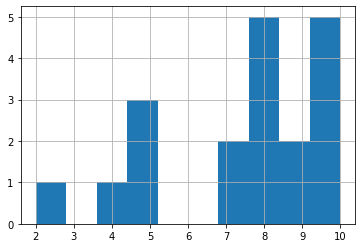

In [677]:
user_movies.iloc[30].hist()

In [448]:
new_data = pd.DataFrame()
for i in range(len(user_movies)):
    for j in user_movies.columns:
        if user_movies[j][i] > 0:
            new_data = new_data.append([[user_movies[j][i], j, i]])

In [449]:
new_data.columns = ['rating', 'film_id', '_user_id']

In [452]:
new_data.index=range(2365)

In [455]:
new_data.rating = new_data.rating.apply(int)

In [456]:
new_data.to_csv('user_movies.csv')

In [457]:
new_data

,rating,film_id,_user_id
0,10,tt0078748,0
1,5,tt0079817,0
2,9,tt0082405,0
3,10,tt0091763,0
4,5,tt0099987,0
...,...,...,...
2360,4,tt3498820,100
2361,10,tt3501632,100
2362,9,tt3748528,100
2363,7,tt5095030,100


In [460]:
films.set_index('imdb_title_id').to_csv('films.csv', sep=';')

In [461]:
films.set_index('imdb_title_id')

,avg_rating,name,preview
imdb_title_id,,,
tt0416449,7.6,300,King Leonidas of Sparta and a force of 300 men...
tt0103639,8.0,Aladdin,A kindhearted street urchin and a power-hungry...
tt6139732,7.0,Aladdin,A kind-hearted street urchin and a power-hungr...
tt0078748,8.4,Alien,After a space merchant vessel receives an unkn...
tt0169547,8.3,American Beauty,A sexually frustrated suburban father has a mi...
...,...,...,...
tt0332452,7.2,Troy,"An adaptation of Homer's great epic, the film ..."
tt0111503,7.2,True Lies,"A fearless, globe-trotting, terrorist-battling..."
tt1049413,8.2,Up,78-year-old Carl Fredricksen travels to Paradi...


In [535]:
vectors = pd.read_csv('vectors.csv', index_col=0)
users = pd.read_csv('users.csv', index_col=0, delimiter=';')
films = pd.read_csv('films.csv', index_col=0, delimiter=';')

In [536]:
films

,avg_rating,name,preview
imdb_title_id,,,
tt0416449,7.6,300,King Leonidas of Sparta and a force of 300 men...
tt0103639,8.0,Aladdin,A kindhearted street urchin and a power-hungry...
tt6139732,7.0,Aladdin,A kind-hearted street urchin and a power-hungr...
tt0078748,8.4,Alien,After a space merchant vessel receives an unkn...
tt0169547,8.3,American Beauty,A sexually frustrated suburban father has a mi...
...,...,...,...
tt0332452,7.2,Troy,"An adaptation of Homer's great epic, the film ..."
tt0111503,7.2,True Lies,"A fearless, globe-trotting, terrorist-battling..."
tt1049413,8.2,Up,78-year-old Carl Fredricksen travels to Paradi...


In [488]:
response = pd.read_json('message.json')
response.film = response.film.apply(lambda x: x['imdb_title_id'])

In [515]:
sum(response.rating)

184

In [506]:
tmp = pd.DataFrame()
tmp = tmp.append([[0]*101])
tmp.columns = users.columns

In [522]:
neighbors = model_users.kneighbors(tmp)[1][0]

In [533]:
users.loc[neighbors].apply(sum).sort_values()[-7:].index

Index(['tt0816692', 'tt0103639', 'tt0107818', 'tt1170358', 'tt1289401',
       'tt0087363', 'tt0094737'],
      dtype='object')

In [513]:
sum(tmp.iloc[0])

182

In [ ]:
from sklearn.neighbors import NearestNeighbors
model_users = NearestNeighbors(n_neighbors=7)
model_users.fit(user_movies)

model_movies = NearestNeighbors(n_neighbors = 7)
model_movies.fit(vectors)

In [699]:
vectors = pd.read_csv('vectors.csv', index_col=0)
users = pd.read_csv('users.csv', index_col=0, delimiter=';')
films = pd.read_csv('films.csv', index_col=0, delimiter=';')



from sklearn.neighbors import NearestNeighbors
model_users = NearestNeighbors(n_neighbors=7)
model_users.fit(users)

model_movies = NearestNeighbors(n_neighbors = 7)
model_movies.fit(vectors)

def user_rec(user_id):
    response = pd.read_json('message.json')
    response.film = response.film.apply(lambda x: x['imdb_title_id'])
    tmp = pd.DataFrame()
    tmp = tmp.append([[0]*101])
    tmp.columns = users.columns
    tmp[response.film] = response.rating
    neighbors = model_users.kneighbors(tmp)[1][0]
    ind = users.loc[neighbors].apply(sum).sort_values()[-7:].index
    return films.loc[ind]

def film_rec(user_id):
    response = pd.read_json('message.json')
    response.film = response.film.apply(lambda x: x['imdb_title_id'])
    tmp = vectors.drop(response[response.rating == max(response.rating)]['film'])
    model_tmp = NearestNeighbors(n_neighbors = 7)
    model_tmp.fit(tmp)
    res = model_tmp.kneighbors(vectors.loc[response[response.rating == max(response.rating)]['film']])[1]
    res = np.random.choice(res.flatten(), 7)
    res = films.loc[tmp.iloc[res].index]
    return res.drop_duplicates()

In [691]:
response = pd.read_json('message.json')
response.film = response.film.apply(lambda x: x['imdb_title_id'])
response

,id,film,user,rating
0,79,tt0075148,{'id': 4},7
1,80,tt0093105,{'id': 4},5
2,81,tt0094737,{'id': 4},10
3,82,tt0099987,{'id': 4},4
4,83,tt0107818,{'id': 4},10
5,84,tt0109830,{'id': 4},7
6,85,tt0111257,{'id': 4},10
7,86,tt0112384,{'id': 4},7
8,87,tt0113189,{'id': 4},8
9,88,tt0120338,{'id': 4},9


In [703]:
film_rec(0)

,avg_rating,name,preview
imdb_title_id,,,
tt0103639,8.0,Aladdin,A kindhearted street urchin and a power-hungry...
tt0116695,7.3,Jerry Maguire,When a sports agent has a moral epiphany and i...
tt0114369,8.6,Seven,"Two detectives, a rookie and a veteran, hunt a..."
tt1074638,7.7,Skyfall,James Bond's loyalty to M is tested when her p...
tt0372784,8.2,Batman Begins,"After training with his mentor, Batman begins ..."
tt0117500,7.4,The Rock,A mild-mannered chemist and an ex-con must lea...
tt0126029,7.8,Shrek,A mean lord exiles fairytale creatures to the ...


In [695]:
user_rec(0)

,avg_rating,name,preview
tt0816692,8.6,Interstellar,A team of explorers travel through a wormhole ...
tt0103639,8.0,Aladdin,A kindhearted street urchin and a power-hungry...
tt0107818,7.7,Philadelphia,When a man with HIV is fired by his law firm b...
tt1170358,7.8,The Hobbit: The Desolation of Smaug,"The dwarves, along with Bilbo Baggins and Gand..."
tt1289401,5.2,Ghostbusters,"Following a ghost invasion of Manhattan, paran..."
tt0087363,7.3,Gremlins,A boy inadvertently breaks three important rul...
tt0094737,7.3,Big,"After wishing to be made big, a teenage boy wa..."


In [543]:
response = pd.read_json('message.json')
response.film = response.film.apply(lambda x: x['imdb_title_id'])

In [550]:
tmp = vectors.drop(response[response.rating == max(response.rating)]['film'])

In [680]:
model_tmp = NearestNeighbors(n_neighbors = 7)
# model_tmp.fit(tmp)
# model_tmp.kneighbors(vectors[response[response.rating == max(response.rating)]['film']])

In [561]:
model_tmp = NearestNeighbors(n_neighbors = 7)
model_tmp.fit(tmp)
res = model_tmp.kneighbors(vectors.loc[response[response.rating == max(response.rating)]['film']])[1]

In [570]:
np.random.choice(res.flatten(), 7)

array([24, 15, 87, 57, 86, 67, 86], dtype=int64)

In [577]:
films = films.reset_index()

In [578]:
films

,imdb_title_id,avg_rating,name,preview
0,tt0416449,7.6,300,King Leonidas of Sparta and a force of 300 men...
1,tt0103639,8.0,Aladdin,A kindhearted street urchin and a power-hungry...
2,tt6139732,7.0,Aladdin,A kind-hearted street urchin and a power-hungr...
3,tt0078748,8.4,Alien,After a space merchant vessel receives an unkn...
4,tt0169547,8.3,American Beauty,A sexually frustrated suburban father has a mi...
...,...,...,...,...
96,tt0332452,7.2,Troy,"An adaptation of Homer's great epic, the film ..."
97,tt0111503,7.2,True Lies,"A fearless, globe-trotting, terrorist-battling..."
98,tt1049413,8.2,Up,78-year-old Carl Fredricksen travels to Paradi...
99,tt0451279,7.4,Wonder Woman,When a pilot crashes and tells of conflict in ...


In [579]:
films.index = range(1, 102)

In [581]:
films.to_csv('new_films.csv')

In [583]:
films = films.reset_index()

In [586]:
films.columns = ['id', 'imdb_title_id', 'avg_rating', 'name', 'preview']

In [591]:
films = films.set_index('id')

In [592]:
films.to_csv('new_films.csv')

In [595]:
tmp = pd.read_csv('user_movies.csv', index_col=0)

In [598]:
tmp.index.name = 'id'

tmp

In [600]:
tmp.to_csv('user_movies.csv')

In [601]:
tmp = pd.DataFrame()

In [606]:
tmp = tmp.append(list(range(1, 102)))

In [607]:
tmp.columns=['id']

In [610]:
tmp = tmp.set_index('id')

In [611]:
tmp.to_csv('new_user.csv')

In [612]:
tmp

""
id
1
2
3
4
5
...
97
98
99


In [616]:
films = films[['avg_rating', 'imdb_title_id', 'name', 'preview']]

In [617]:
films.to_csv('new_films.csv')

In [625]:
tmp = pd.read_csv('user_movies.csv', index_col=0)
tmp.columns = ['rating', 'imdb_title_id', '_user_id']

In [626]:
tmp['film_id'] = 0

In [636]:
films = pd.read_csv('new_films.csv', index_col=0)

In [637]:
films = films.reset_index()

In [638]:
films

,id,avg_rating,imdb_title_id,name,preview
0,1,7.6,tt0416449,300,King Leonidas of Sparta and a force of 300 men...
1,2,8.0,tt0103639,Aladdin,A kindhearted street urchin and a power-hungry...
2,3,7.0,tt6139732,Aladdin,A kind-hearted street urchin and a power-hungr...
3,4,8.4,tt0078748,Alien,After a space merchant vessel receives an unkn...
4,5,8.3,tt0169547,American Beauty,A sexually frustrated suburban father has a mi...
...,...,...,...,...,...
96,97,7.2,tt0332452,Troy,"An adaptation of Homer's great epic, the film ..."
97,98,7.2,tt0111503,True Lies,"A fearless, globe-trotting, terrorist-battling..."
98,99,8.2,tt1049413,Up,78-year-old Carl Fredricksen travels to Paradi...
99,100,7.4,tt0451279,Wonder Woman,When a pilot crashes and tells of conflict in ...


In [649]:
for i in range(len(tmp)):
    tmp['film_id'][i+1]  = films[films['imdb_title_id']==tmp['imdb_title_id'].iloc[i]]['id']

In [652]:
tmp.to_csv('user_movies_new.csv')

In [651]:
user_movies

,tt0074751,tt0075148,tt0078346,tt0078748,tt0078788,tt0079817,tt0082405,tt0084805,tt0087363,tt0091268,...,tt3470600,tt3498820,tt3501632,tt3748528,tt4154756,tt4912910,tt5095030,tt5463162,tt6139732,tt9165458
0,0.0,0.0,0.0,10.0,0.0,5.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,4.0,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
3,0.0,10.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0
4,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,10.0,0.0,...,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0
97,5.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,10.0,0.0,0.0,0.0,7.0,0.0,5.0
98,0.0,0.0,0.0,10.0,0.0,10.0,0.0,0.0,9.0,7.0,...,0.0,7.0,9.0,0.0,0.0,9.0,9.0,0.0,0.0,0.0
99,0.0,7.0,9.0,0.0,6.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,8.0,0.0,0.0,0.0,6.0,0.0,9.0,0.0


In [663]:
tmp.to_csv('user_movies_new.csv')

In [658]:
tmp['film_id'] = tmp.film_id.apply(int)

In [662]:
tmp['_user_id'] = tmp['_user_id'].apply(lambda x: x+1)

In [664]:
tmp

,imdb_title_id,rating,film_id,_user_id
id,,,,
1,tt0078748,10,4,1
2,tt0079817,5,64,1
3,tt0082405,9,87,1
4,tt0091763,10,58,1
5,tt0099987,5,89,1
...,...,...,...,...
2361,tt3498820,4,18,101
2362,tt3501632,10,92,101
2363,tt3748528,9,65,101
